# General Assembly DSI - Denver 2018
## Capstone Project - DFS Model
This is my capstone project at General Assembly's fifth [Data Science Immersive](https://generalassemb.ly/education/data-science-immersive) cohort in 2018. I am developing a model to assist in optimizing NFL lineups on the daily fantasy sports platforms [Draft Kings](https://www.draftkings.com/) and [Fan Duel](https://www.fanduel.com/).

### Problem Statement

Can we build a model to predict a football player’s fantasy football performance to estimate their value and implement the model in conjunction with a daily fantasy strategy to be profitable?

### Exploratory Data Analysis - Quarterbacks

**NOTE**: This notebook was a preliminary attempt at understanding how predicting the target variable would work without including player statistics. With a preliminary Linear Regression model I decided it would be important to include at least basic statistical information.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../data/quarterbacks.csv')

In [3]:
data.head()

,Week,Year,GID,Name,Pos,Team,h/a,Oppt,FD points,FD salary,...,Opp_Avg_Ints,Opp_Rank,Opp_Avg_TDs_Allowed,Opp_Avg_Yds_Allowed,Favored,Spread,O/U,Weather,Temperature,Wind
0,2,2011,1378,"Newton, Cam",QB,CAR,h,GB,29.58,7300.0,...,0.0,8,2.0,309.0,GB,-11.0,45.0,Sunny,67.0,1.0
1,2,2011,1252,"Rodgers, Aaron",QB,GB,a,CAR,21.62,9900.0,...,0.0,3,3.0,419.0,GB,-11.0,45.0,Sunny,67.0,1.0
2,2,2011,1131,"Brady, Tom",QB,NE,h,LAC,29.22,9100.0,...,1.0,11,2.0,416.0,NE,-7.0,53.5,Sunny,63.0,12.0
3,2,2011,1231,"Rivers, Philip",QB,LAC,a,NE,20.32,8900.0,...,1.0,1,1.0,39.0,NE,-7.0,53.5,Sunny,63.0,12.0
4,2,2011,1340,"Stafford, Matthew",QB,DET,h,KC,26.86,7900.0,...,1.0,31,1.0,266.0,DET,-9.0,45.0,DOME,72.0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4136 entries, 0 to 4135
Data columns (total 22 columns):
Week                    4136 non-null int64
Year                    4136 non-null int64
GID                     4136 non-null int64
Name                    4136 non-null object
Pos                     4136 non-null object
Team                    4136 non-null object
h/a                     4136 non-null object
Oppt                    4136 non-null object
FD points               4136 non-null float64
FD salary               4136 non-null float64
Opp_Avg_Att_Allowed     4136 non-null float64
Opp_Avg_Comp_Allowed    4136 non-null float64
Opp_Avg_Ints            4136 non-null float64
Opp_Rank                4136 non-null int64
Opp_Avg_TDs_Allowed     4136 non-null float64
Opp_Avg_Yds_Allowed     4136 non-null float64
Favored                 4136 non-null object
Spread                  4136 non-null float64
O/U                     4136 non-null float64
Weather                 4136 non-

### Column Transformations
- Transform `Home / Away` to 1's and 0's
- Transform `Favored` to 1's and 0's
- Dummy `Weather` Column
- Drop `GID`

In [5]:
# 1's & 0's for 'h/a'
data['h/a'] = data['h/a'].map({'h': 1, 'a': 0})

In [6]:
# 1's & 0's for 'Favored'
# Not going to worry about "Pick 'em Games"; that would suggest you are NOT favored aka 0
for index, player in data.iterrows():
    if player['Favored'] == player['Team']:
        data.loc[index, 'Favored'] = 1
    else:
        data.loc[index, 'Favored'] = 0

In [7]:
data = pd.get_dummies(data, columns = ['Weather'])

In [8]:
data.drop('GID', axis = 1, inplace = True)

In [9]:
data.head()

,Week,Year,Name,Pos,Team,h/a,Oppt,FD points,FD salary,Opp_Avg_Att_Allowed,...,Temperature,Wind,Weather_DOME,Weather_Fog,Weather_Rain,Weather_Rain | Fog,Weather_Snow,Weather_Snow | Fog,Weather_Snow | Freezing Rain,Weather_Sunny
0,2,2011,"Newton, Cam",QB,CAR,1,GB,29.58,7300.0,27.0,...,67.0,1.0,0,0,0,0,0,0,0,1
1,2,2011,"Rodgers, Aaron",QB,GB,0,CAR,21.62,9900.0,49.0,...,67.0,1.0,0,0,0,0,0,0,0,1
2,2,2011,"Brady, Tom",QB,NE,1,LAC,29.22,9100.0,49.0,...,63.0,12.0,0,0,0,0,0,0,0,1
3,2,2011,"Rivers, Philip",QB,LAC,0,NE,20.32,8900.0,15.0,...,63.0,12.0,0,0,0,0,0,0,0,1
4,2,2011,"Stafford, Matthew",QB,DET,1,KC,26.86,7900.0,46.0,...,72.0,0.0,1,0,0,0,0,0,0,0


In [112]:
# data.to_csv('../data/quarterbacks.csv', index = True)

In [10]:
data.shape

(4136, 28)

In [11]:
data = data.groupby(['Name', 'Week', 'Year', 'Team', 'Oppt']).sum()

In [12]:
print('Total df shape:', data.shape)
print('Players with less than one point:', data[data['FD points'] < 1].shape)
print('Percentage of players below 1 fantasy point:', data[data['FD points'] < 1].shape[0] / data.shape[0])
print('Percentage of players with exactly 0 fantasy points:',  data[data['FD points'] == 0].shape[0] / data.shape[0])
print('Percentage of players with less than 0 fantasy points:', data[data['FD points'] < 0].shape[0] / data.shape[0])

Total df shape: (4136, 22)
Players with less than one point: (571, 22)
Percentage of players below 1 fantasy point: 0.1380560928433269
Percentage of players with exactly 0 fantasy points: 0.06624758220502901
Percentage of players with less than 0 fantasy points: 0.03892649903288201


In [13]:
data[data['FD salary'] == 0].shape[0]

34

> So there are 34 observations with no salary, but that really isn't important to our model so I think we can keep those.

/Users/charleydixon/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/charleydixon/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


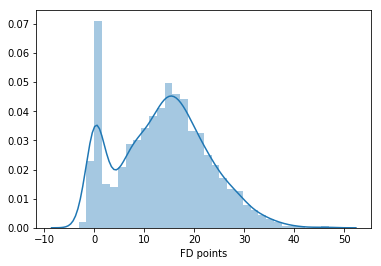

In [14]:
# Distribution of points
sns.distplot(data['FD points'])

/Users/charleydixon/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


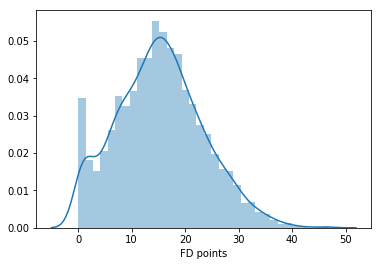

In [15]:
# let's remove anything at or below zero
sns.distplot(data[data['FD points'] > 0]['FD points'])

/Users/charleydixon/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


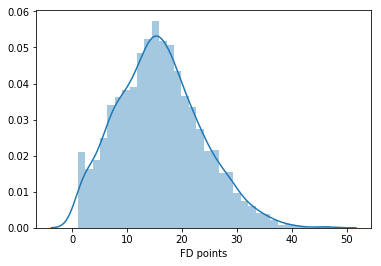

In [16]:
# what about removing things at or below 1?
sns.distplot(data[data['FD points'] > 1]['FD points'])

> So a lot of these low values are likely due to situations where an injury occurred or a backup came in for a brief stint. Ultimately, my goal is to predict the best lineups which means I would not be trying to get these players anyway. Let's see what removing them would do to our dataset 

In [17]:
print('Dropping observations with 1 point or less removes', 
      data.shape[0] - data[data['FD points'] > 1].shape[0], '(',
      1 - (data[data['FD points'] > 1].shape[0] / data.shape[0]), 'percent)',
      'data points')

Dropping observations with 1 point or less removes 575 ( 0.13902321083172142 percent) data points


In [18]:
print('Dropping observations with 0 points or less removes', 
      data.shape[0] - data[data['FD points'] > 0].shape[0], '(',
      1 - (data[data['FD points'] > 0].shape[0] / data.shape[0]), 'percent)',
      'data points')

Dropping observations with 0 points or less removes 435 ( 0.10517408123791105 percent) data points


> Being that the lack of data is a real problem for NFL data, I am going to move forward for now without removing any values. Those zero values could end up being important in some way.

Text(0.5, 1.0, 'Points scored based on Salary')

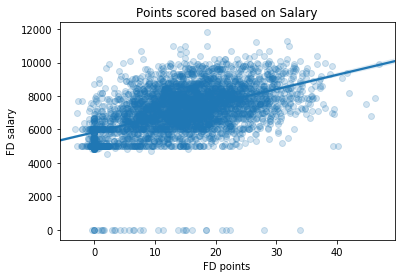

In [19]:
# how do 
sns.regplot(data['FD points'], data['FD salary'], scatter_kws = {'alpha': 0.2}).set_title('Points scored based on Salary')

### ISSUE: MULTICOLLINEARITY

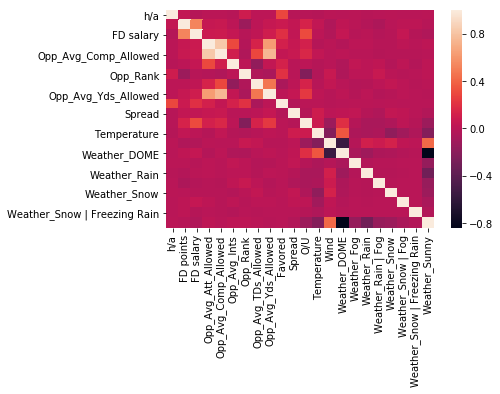

In [20]:
sns.heatmap(data.corr())

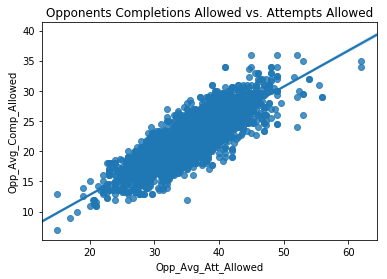

In [21]:
sns.regplot(data['Opp_Avg_Att_Allowed'], data['Opp_Avg_Comp_Allowed']).set_title('Opponents Completions Allowed vs. Attempts Allowed');

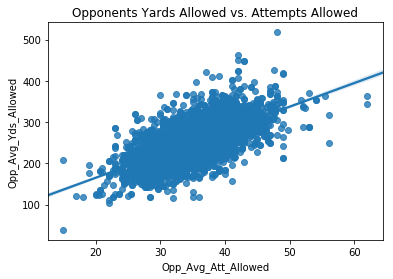

In [22]:
sns.regplot(data['Opp_Avg_Att_Allowed'], data['Opp_Avg_Yds_Allowed']).set_title('Opponents Yards Allowed vs. Attempts Allowed');

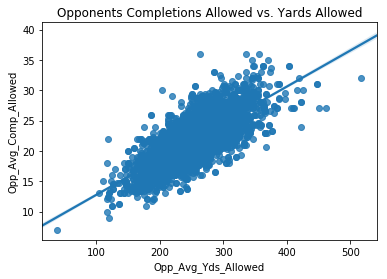

In [23]:
sns.regplot(data['Opp_Avg_Yds_Allowed'], data['Opp_Avg_Comp_Allowed']).set_title('Opponents Completions Allowed vs. Yards Allowed');

In [24]:
data.to_csv('../data/qbs_modeling.csv')

In [25]:
check = pd.read_csv('../data/qbs_modeling.csv')
check.head()

,Name,Week,Year,Team,Oppt,h/a,FD points,FD salary,Opp_Avg_Att_Allowed,Opp_Avg_Comp_Allowed,...,Temperature,Wind,Weather_DOME,Weather_Fog,Weather_Rain,Weather_Rain | Fog,Weather_Snow,Weather_Snow | Fog,Weather_Snow | Freezing Rain,Weather_Sunny
0,"Anderson, Derek",3,2012,CAR,NYG,1,1.84,5000.0,36.5,23.5,...,75.0,3.0,0,0,0,0,0,0,0,1
1,"Anderson, Derek",3,2013,CAR,NYG,1,-0.10,0.0,36.0,26.0,...,77.0,15.0,0,0,0,0,0,0,0,1
2,"Anderson, Derek",3,2014,CAR,PIT,1,7.20,5800.0,41.5,24.5,...,74.0,3.0,0,0,0,0,0,0,0,1
3,"Anderson, Derek",3,2016,CAR,MIN,1,0.12,5000.0,31.0,17.5,...,84.0,2.0,0,0,0,0,0,0,0,1
4,"Anderson, Derek",3,2017,CAR,NO,1,0.68,6000.0,30.0,20.5,...,83.0,6.0,0,0,0,0,0,0,0,1


In [26]:
data.head()

h/a  FD points  FD salary  \
Name            Week Year Team Oppt                              
Anderson, Derek 3    2012 CAR  NYG     1       1.84     5000.0   
                     2013 CAR  NYG     1      -0.10        0.0   
                     2014 CAR  PIT     1       7.20     5800.0   
                     2016 CAR  MIN     1       0.12     5000.0   
                     2017 CAR  NO      1       0.68     6000.0   

                                     Opp_Avg_Att_Allowed  \
Name            Week Year Team Oppt                        
Anderson, Derek 3    2012 CAR  NYG                  36.5   
                     2013 CAR  NYG                  36.0   
                     2014 CAR  PIT                  41.5   
                     2016 CAR  MIN                  31.0   
                     2017 CAR  NO                   30.0   

                                     Opp_Avg_Comp_Allowed  Opp_Avg_Ints  \
Name            Week Year Team Oppt                                       
Anderson, Derek 3    2012 CAR  NYG                   23.5           1.0   
                     2013 CAR  NYG                   26.0           0.5   
                     2014 CAR  PIT                   24.5           1.5   
                     2016 CAR  MIN                   17.5           2.0   
                     2017 CAR  NO                    20.5           0.5   

                                     Opp_Rank  Opp_Avg_TDs_Allowed  \
Name            Week Year Team Oppt                                  
Anderson, Derek 3    2012 CAR  NYG         17                  1.0   
                     2013 CAR  NYG         32                  1.0   
                     2014 CAR  PIT         20                  1.5   
                     2016 CAR  MIN         24                  1.5   
                     2017 CAR  NO          14                  0.0   

                                     Opp_Avg_Yds_Allowed  Favored  \
Name            Week Year Team Oppt                                 
Anderson, Derek 3    2012 CAR  NYG                 231.5        1   
                     2013 CAR  NYG                 308.0        0   
                     2014 CAR  PIT                 237.0        1   
                     2016 CAR  MIN                 210.5        1   
                     2017 CAR  NO                  159.0        1   

                                         ...        Temperature  Wind  \
Name            Week Year Team Oppt      ...                            
Anderson, Derek 3    2012 CAR  NYG       ...               75.0   3.0   
                     2013 CAR  NYG       ...               77.0  15.0   
                     2014 CAR  PIT       ...               74.0   3.0   
                     2016 CAR  MIN       ...               84.0   2.0   
                     2017 CAR  NO        ...               83.0   6.0   

                                     Weather_DOME  Weather_Fog  Weather_Rain  \
Name            Week Year Team Oppt                                            
Anderson, Derek 3    2012 CAR  NYG              0            0             0   
                     2013 CAR  NYG              0            0             0   
                     2014 CAR  PIT              0            0             0   
                     2016 CAR  MIN              0            0             0   
                     2017 CAR  NO               0            0             0   

                                     Weather_Rain | Fog  Weather_Snow  \
Name            Week Year Team Oppt                                     
Anderson, Derek 3    2012 CAR  NYG                    0             0   
                     2013 CAR  NYG                    0             0   
                     2014 CAR  PIT                    0             0   
                     2016 CAR  MIN                    0             0   
                     2017 CAR  NO                     0             0   

                                     Weather_Snow | Fog  \
Name    

### First Swag @ Modeling

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

%matplotlib inline 

In [ ]:
features = ['h/a', 'Opp_Avg_Att_Allowed', 'Opp_Avg_Comp_Allowed', 'Opp_Avg_Ints', 'Opp_Rank', 'Opp_Avg_TDs_Allowed',
            'Opp_Avg_Yds_Allowed', 'Favored', 'Spread', 'O/U', 'Temperature', 'Wind', 'Weather_DOME', 'Weather_Fog',
            'Weather_Rain', 'Weather_Rain | Fog', 'Weather_Snow','Weather_Snow | Fog', 'Weather_Snow | Freezing Rain', 
            'Weather_Sunny']

In [57]:
X = data[features]
y = data['FD points']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [58]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Evaluation
Using RMSE to test for overfitting, and looking at the MAE distribution to get a better idea of the model's accuracy.

In [97]:
# training score
model.score(X_train, y_train)

0.048505050895682245

In [60]:
# testing score
model.score(X_test, y_test)

0.02602491954581831

> As you can see above, this is not the type of problem that R2 scores are going to be of much use. I don't really care to explain the variance in this data, I know that it will be tough due to human error. Let's instead look at the distribution of my residuals.

In [61]:
predictions = model.predict(X_test)

In [95]:
def mae_distribution(y_pred, y_test = y_test):
    # check to make sure you've input the right stuff
    if len(y_pred) == len(y_test):
        comparison_df = pd.DataFrame(y_test)
        target = comparison_df.columns[0]
        comparison_df['Predictions'] = y_pred
        comparison_df['Mean Absolute Error'] = abs(comparison_df[target] - comparison_df['Predictions'])
        print(comparison_df[['Mean Absolute Error']].describe()[1:])
        return sns.distplot(comparison_df['Mean Absolute Error']);
    else:
        print('Length of predicted values does not meet length of actual values... check your data')

      Mean Absolute Error
mean             7.363812
std              5.498217
min              0.001814
25%              2.731515
50%              6.093326
75%             11.677462
max             29.867974


/Users/charleydixon/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/charleydixon/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


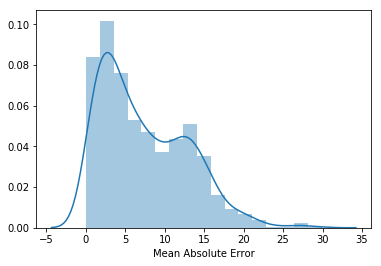

In [96]:
mae_distribution(predictions)

> Alright this is NOT great. Being off by an average of 7.36 points isn't very good to begin with, and look at the standard deviation... YIKES. I think what this is telling me is that the model needs more information. I'm going to have to collect player statistics and roll them up to each game, just like I did with the defensive data.

In [107]:
def run_model(X, y, model):
    # model fitting
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
    model = model
    model.fit(X_train, y_train)
    
    # predicting
    training_preds = model.predict(X_train)
    testing_preds = model.predict(X_test)
    print('Training RMSE:', np.sqrt(mean_squared_error(y_train, training_preds)))
    print('Testing RMSE:', np.sqrt(mean_squared_error(y_test, testing_preds)))
    return testing_preds

In [ ]:
features = ['h/a', 'Opp_Avg_Att_Allowed', 'Opp_Avg_Comp_Allowed', 'Opp_Avg_Ints', 'Opp_Rank', 'Opp_Avg_TDs_Allowed',
            'Opp_Avg_Yds_Allowed', 'Favored', 'Spread', 'O/U', 'Temperature', 'Wind', 'Weather_DOME', 'Weather_Fog',
            'Weather_Rain', 'Weather_Rain | Fog', 'Weather_Snow','Weather_Snow | Fog', 'Weather_Snow | Freezing Rain', 
            'Weather_Sunny']

X = data[features]
y = data['FD points']